Objective:

    The objective of this assignment is to implement PCA on a given dataset and analyse the results.

Deliverables:

    Jupyter notebook containing the code for the PCA implementation.
    A report summarising the results of PCA and clustering analysis.
    Scatter plot showing the results of PCA.
    A table showing the performance metrics for the clustering algorithm.
    
Instructions:
    
    Download the wine dataset from the UCI Machine Learning Repository 
    Load the dataset into a Pandas dataframe.
    Split the dataset into features and target variables.
    Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
    
    Implement PCA on the preprocessed dataset using the scikit-learn library.
    
    Determine the optimal number of principal components to retain based on the explained variance ratio.
    Visualise the results of PCA using a scatter plot.
    
    Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
    Interpret the results of PCA and clustering analysis.
    (https://archive.ics.uci.edu/ml/datasets/Wine).

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
# metadata 
print(wine.metadata) 
  
# variable information 
print(wine.variables) 


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [6]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [9]:
X.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

In [11]:
X.duplicated().sum()

0

In [12]:
X.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [13]:
X.head(4)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


In [14]:
X.tail(3)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [17]:
len(X)

178

In [18]:
X.columns

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline'],
      dtype='object')

In [19]:
#### import important things


In [31]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [25]:
X.mean()

Alcohol                          13.000618
Malicacid                         2.336348
Ash                               2.366517
Alcalinity_of_ash                19.494944
Magnesium                        99.741573
Total_phenols                     2.295112
Flavanoids                        2.029270
Nonflavanoid_phenols              0.361854
Proanthocyanins                   1.590899
Color_intensity                   5.058090
Hue                               0.957449
0D280_0D315_of_diluted_wines      2.611685
Proline                         746.893258
dtype: float64

In [26]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [27]:
np.unique(y)

array([1, 2, 3], dtype=int64)

In [28]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X)
X_new = pd.DataFrame(X_new, columns=X.columns)
X_new

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [29]:
X_new.head(3)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148


In [30]:
y.head(3)

,class
0,1
1,1
2,1


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size= 0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142, 1) (36, 1)


In [33]:
pca = PCA()

In [34]:
pca.fit(X_train)

PCA()

In [35]:
pca.components_

array([[-0.12066745,  0.26133943,  0.02788356,  0.2496346 , -0.14687697,
        -0.38510351, -0.4148827 ,  0.30655131, -0.30951491,  0.12396866,
        -0.30522527, -0.38583351, -0.25469502],
       [-0.49422695, -0.19247019, -0.32757004,  0.03349307, -0.27589848,
        -0.11126263, -0.0290841 , -0.07092196, -0.08862596, -0.52922417,
         0.28130703,  0.13120288, -0.36278817],
       [-0.19330087,  0.13197297,  0.59903776,  0.60443358,  0.06119482,
         0.1738233 ,  0.17862017,  0.20314841,  0.14733562, -0.13629651,
         0.08595284,  0.21753349, -0.13749436],
       [ 0.09076028,  0.4164102 , -0.18904029, -0.05586011, -0.68395831,
         0.24508968,  0.17940617,  0.07316583,  0.30769197,  0.10360611,
        -0.25689253,  0.1604521 , -0.1302059 ],
       [-0.31323051,  0.25383008, -0.20981424,  0.10238804,  0.46239808,
        -0.00468661, -0.02457644, -0.46865851,  0.38266324,  0.04313467,
        -0.382161  , -0.0346486 , -0.2309406 ],
       [-0.19428065, -0.638927

In [37]:
pca.n_components_

13

In [38]:
pca.explained_variance_

array([4.83276484, 2.47147595, 1.58630645, 1.0054665 , 0.9052796 ,
       0.65983586, 0.57673014, 0.36558439, 0.30433143, 0.25626719,
       0.2268225 , 0.16916164, 0.11013005])

In [39]:
pca.explained_variance_ratio_

array([0.3587757 , 0.18347789, 0.11776451, 0.07464401, 0.06720632,
       0.04898502, 0.0428154 , 0.02714032, 0.02259301, 0.01902481,
       0.01683889, 0.01255825, 0.00817585])

In [40]:
for i in range(2,15):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    total_variance = sum(pca.explained_variance_ratio_)
    if total_variance > 0.90:
        print("variance : ",total_variance)
        print("number of component is :", i)
        break

variance :  0.9208091745231753
number of component is : 8


In [41]:
pca = PCA(n_components=8)
pca.fit(X_train)
total_variance = sum(pca.explained_variance_ratio_)
print("total variance :",total_variance)

total variance : 0.9208091745231753


In [42]:
pca

PCA(n_components=8)

In [43]:
pca.components_

array([[-0.12066745,  0.26133943,  0.02788356,  0.2496346 , -0.14687697,
        -0.38510351, -0.4148827 ,  0.30655131, -0.30951491,  0.12396866,
        -0.30522527, -0.38583351, -0.25469502],
       [-0.49422695, -0.19247019, -0.32757004,  0.03349307, -0.27589848,
        -0.11126263, -0.0290841 , -0.07092196, -0.08862596, -0.52922417,
         0.28130703,  0.13120288, -0.36278817],
       [-0.19330087,  0.13197297,  0.59903776,  0.60443358,  0.06119482,
         0.1738233 ,  0.17862017,  0.20314841,  0.14733562, -0.13629651,
         0.08595284,  0.21753349, -0.13749436],
       [ 0.09076028,  0.4164102 , -0.18904029, -0.05586011, -0.68395831,
         0.24508968,  0.17940617,  0.07316583,  0.30769197,  0.10360611,
        -0.25689253,  0.1604521 , -0.1302059 ],
       [-0.31323051,  0.25383008, -0.20981424,  0.10238804,  0.46239808,
        -0.00468661, -0.02457644, -0.46865851,  0.38266324,  0.04313467,
        -0.382161  , -0.0346486 , -0.2309406 ],
       [-0.19428065, -0.638927

In [44]:
len(pca.components_)

8

In [46]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [47]:
X_test_pca

array([[-2.09755623e+00, -1.10024593e+00, -1.70010698e-01,
        -8.35328318e-02,  7.61168719e-01, -1.58782794e+00,
        -2.96146274e-01, -3.74843220e-01],
       [-1.08235371e+00, -1.77933566e+00,  1.18847318e-01,
         4.42256728e-01,  2.28546778e-02, -2.01112109e+00,
        -4.74912396e-02, -2.81037287e-01],
       [ 2.74644008e+00, -1.53865214e-01,  5.58583721e-01,
        -6.39332484e-01, -9.66237825e-01, -5.64836349e-01,
        -6.80853877e-02, -4.33682457e-01],
       [-2.41940432e+00, -1.40495619e+00,  1.35031972e+00,
        -1.16109172e-01, -6.52478771e-01,  5.79618643e-01,
        -5.02535373e-01,  1.00194994e+00],
       [-3.58680307e-01,  2.43251444e+00, -9.38212864e-01,
         5.20403982e-01, -5.93884319e-01,  1.36024900e-01,
        -1.27706717e+00,  2.03250331e-01],
       [-2.07250496e+00, -2.43089607e+00,  7.28877690e-01,
        -9.29205416e-01, -4.57248088e-01, -9.08564782e-02,
        -4.11661887e-03,  4.28607657e-01],
       [ 3.74398486e-01,  2.237635

In [51]:
X_train_pca

array([[ 1.23838431, -3.67303077,  1.11774203, ...,  3.10980652,
        -0.6451541 ,  0.88374983],
       [ 3.95580496, -0.46962285,  1.75218377, ..., -1.00443123,
         1.30374654, -0.08576026],
       [-2.35321257,  1.24045098, -0.1236395 , ...,  1.00315462,
        -1.01023821, -0.70224748],
       ...,
       [-4.20902039, -2.41112752, -1.18797805, ...,  0.58165275,
         0.87477556,  0.35819992],
       [ 1.81402439,  1.54871791, -0.05618857, ...,  1.09021004,
         0.57679621,  0.46197362],
       [ 0.04339527,  1.14446389,  1.06336933, ..., -0.60137381,
        -0.65644196, -0.87877338]])

In [54]:
x1 = X_train_pca[:,0]
x2 = X_train_pca[:,1]
x1 , x2

(array([ 1.23838431,  3.95580496, -2.35321257,  1.73555159, -1.59666061,
        -0.28071319, -0.97078213,  0.72596213,  2.35684711, -2.46539639,
        -0.99624567,  1.11532579,  2.68197174, -2.82661642, -0.56715363,
        -2.73019651, -1.75290042,  2.83200614,  3.06468258, -0.55071934,
        -1.43825513, -1.39660377, -0.92764934, -2.58434154,  4.25380341,
        -1.22560626, -2.22038092,  2.96017146, -1.75264967, -2.41753463,
        -1.27884583,  2.18961853, -1.00065787, -1.66404801, -2.66675056,
         3.12119825,  0.65107519, -3.42112621,  3.62328329,  0.3933418 ,
        -3.31421696,  2.9689611 , -0.13967972,  0.44805904, -2.1654029 ,
         0.41076923, -2.16981159, -2.60908623,  1.5396292 , -0.95732566,
        -1.70472186,  2.88645057, -1.14707778, -0.45753646, -0.97558121,
        -2.52690054,  0.34672275,  0.65392567, -0.8515143 ,  3.45616171,
         2.8273445 , -2.83451444, -1.14200916,  3.03214959,  2.50762884,
         1.71386384, -2.58801726, -1.85476397, -0.0

In [58]:
len(x1)

142

In [60]:
x1.shape, y_train.shape

((142,), (142, 1))

In [66]:
y_train.iloc[:,0]

158    3
137    3
98     2
159    3
38     1
      ..
71     2
106    2
14     1
92     2
102    2
Name: class, Length: 142, dtype: int64

In [59]:
len(y_train)

142

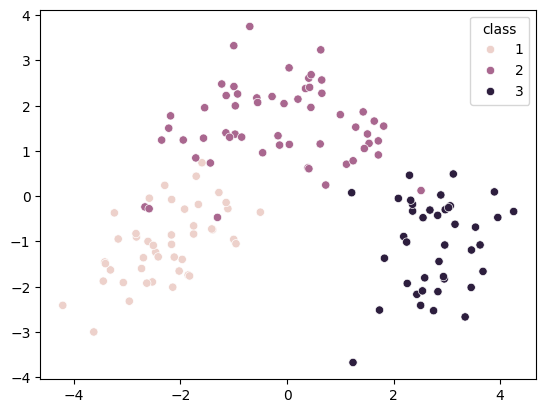

In [65]:
sns.scatterplot(x= list(x1), y= list(x2), hue=y_train.iloc[:,0])
plt.show()

In [68]:
from sklearn.metrics import silhouette_score

In [67]:
model = KMeans(n_clusters=8, init='k-means++')
model

KMeans()

In [100]:
model.fit(X_train_pca,y_train)
y_hat = model.predict(X_test_pca)
score = silhouette_score(y_test, y_hat)
score

-0.16666666666666666

In [101]:
y_hat

array([2, 7, 1, 7, 3, 7, 0, 4, 0, 5, 7, 4, 0, 1, 7, 0, 6, 6, 2, 6, 2, 3,
       6, 4, 4, 4, 3, 7, 6, 2, 2, 0, 1, 2, 2, 2])

In [105]:
for component in  range(2,10):
    model = KMeans(n_clusters=component, init='k-means++')
    model.fit(X_train_pca,y_train)
    y_hat = model.predict(X_test_pca)
    score = silhouette_score(y_test, y_hat)
    if score > 0.60:
        print("number of component require is : ",component)
        print("score is : ",score)
        break

number of component require is :  3
score is :  0.9166666666666666


#### we can see the number of cluster is 3

In [106]:
model = KMeans(n_clusters=component, init='k-means++')
model.fit(X_train_pca,y_train)
y_hat = model.predict(X_test_pca)
score = silhouette_score(y_test, y_hat)

In [107]:
print("test score is :",score)
train_score = silhouette_score(y_train, model.predict(X_train_pca))
print(f"train data accuracy :",train_score)

test score is : 0.9166666666666666
train data accuracy : 0.9161426672441862


In [108]:
y_test

,class
19,1
45,1
140,3
30,1
67,2
16,1
119,2
174,3
109,2
141,3


In [109]:
y_hat

array([0, 0, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 2, 0, 2,
       2, 1, 1, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0])

In [112]:
x1 = X_test_pca[:,0]
x2 = X_test_pca[:,1]

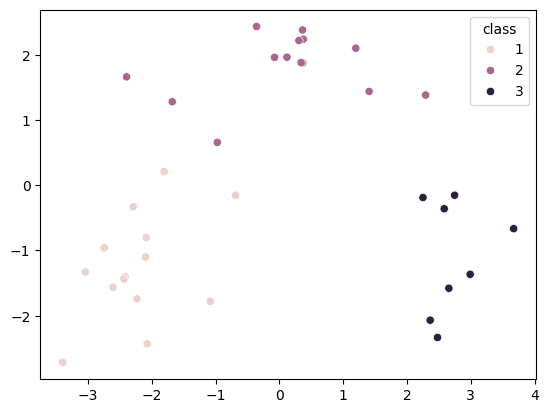

In [114]:
sns.scatterplot(x= list(x1), y= list(x2), hue=y_test.iloc[:,0])
plt.show()

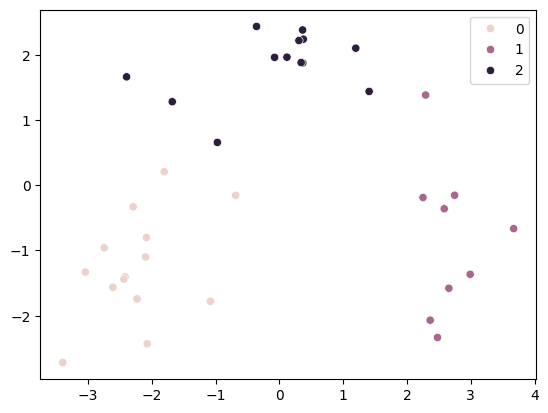

In [115]:
sns.scatterplot(x= list(x1), y= list(x2), hue=y_hat)
plt.show()

In [116]:
### we can see how accurate our model is 

In [117]:
model

KMeans(n_clusters=3)

In [118]:
import pickle

In [122]:
pickle.dump(model,open("my_pca_model.pkl","wb"))

In [123]:
loaded_model = pickle.load(open("my_pca_model.pkl","rb"))
loaded_model

KMeans(n_clusters=3)